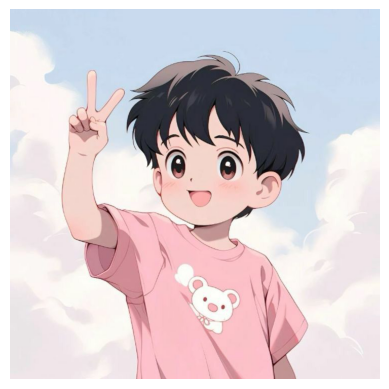

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('boy.jpeg')
rimage=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(rimage)
plt.axis('off')
plt.show()

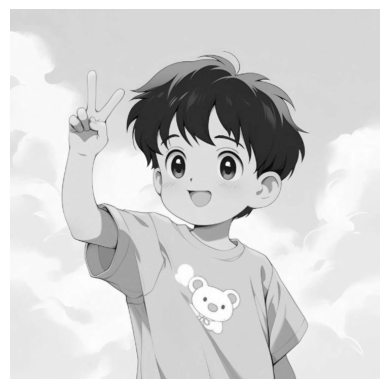

In [2]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap='gray')
plt.axis('off')  
plt.show()

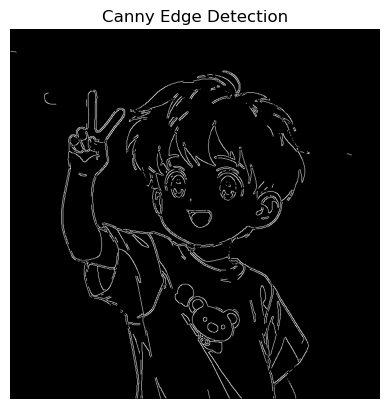

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_filter(image, kernel_size=5, sigma=1.0):
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    center = kernel_size // 2
    for x in range(kernel_size):
        for y in range(kernel_size):
            distance = (x - center)**2 + (y - center)**2
            kernel[x, y] = (1 / (2 * np.pi * sigma**2)) * np.exp(-distance / (2 * sigma**2))
    kernel /= np.sum(kernel)    
    return kernel

def sobel_filters(image):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    gradient_x = cv2.filter2D(image, cv2.CV_64F, sobel_x)
    gradient_y = cv2.filter2D(image, cv2.CV_64F, sobel_y)
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    direction = np.arctan2(gradient_y, gradient_x) 
    return magnitude, direction

def non_max_suppression(magnitude, direction):
    rows, cols = magnitude.shape
    suppressed = np.zeros((rows, cols), dtype=np.uint8)
    angle = np.rad2deg(direction) % 180  
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            q, r = 255, 255
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q, r = magnitude[i, j + 1], magnitude[i, j - 1] 
            elif 22.5 <= angle[i, j] < 67.5:
                q, r = magnitude[i + 1, j - 1], magnitude[i - 1, j + 1] 
            elif 67.5 <= angle[i, j] < 112.5:
                q, r = magnitude[i + 1, j], magnitude[i - 1, j] 
            elif 112.5 <= angle[i, j] < 157.5:
                q, r = magnitude[i - 1, j - 1], magnitude[i + 1, j + 1]  
                
            if magnitude[i, j] >= q and magnitude[i, j] >= r:
                suppressed[i, j] = magnitude[i, j]
            else:
                suppressed[i, j] = 0

    return suppressed

def threshold(image, low=50, high=150):
    strong = np.uint8(255)
    weak = np.uint8(75)
    strong_edges = image >= high 
    weak_edges = (image >= low) & (image < high) 
    result = np.zeros_like(image, dtype=np.uint8)
    result[strong_edges] = strong
    result[weak_edges] = weak
    return result

def hysteresis(image, weak, strong=255):
    rows, cols = image.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if image[i, j] == weak:
                if ((image[i + 1, j - 1] == strong) or (image[i + 1, j] == strong) or
                        (image[i + 1, j + 1] == strong) or (image[i, j - 1] == strong) or
                        (image[i, j + 1] == strong) or
                        (image[i - 1, j - 1] == strong) or (image[i - 1, j] == strong) or
                        (image[i - 1, j + 1] == strong)):
                    image[i, j] = strong
                else:
                    image[i, j] = 0
    return image

def canny_edge_detection(image, low_threshold=50, high_threshold=150):
    kernel = gaussian_filter(image)
    blurred = cv2.filter2D(image, -1, kernel) 
    magnitude, direction = sobel_filters(blurred)
    suppressed = non_max_suppression(magnitude, direction)
    thresholded = threshold(suppressed, low=low_threshold, high=high_threshold)
    final_edges = hysteresis(thresholded, weak=75)
    return final_edges

image = cv2.imread('boy.jpeg', cv2.IMREAD_GRAYSCALE)
edges = canny_edge_detection(image, low_threshold=50, high_threshold=80)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')  
plt.show()

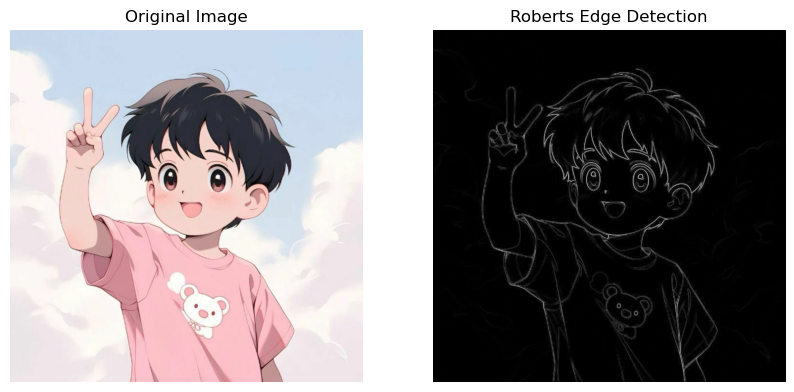

In [4]:
def roberts_edge_detection(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = img_gray.astype(float)
    
    height, width = img_gray.shape
    edges = np.zeros((height, width), dtype=np.uint8)
    
    for y in range(height - 1):
        for x in range(width - 1):
            gx = img_gray[y, x] - img_gray[y + 1, x + 1]
            gy = img_gray[y, x + 1] - img_gray[y + 1, x]
            edge_magnitude = np.sqrt(gx**2 + gy**2)
            edges[y, x] = min(255, int(edge_magnitude))
    
    return edges

image = cv2.imread("boy.jpeg") 
edges = roberts_edge_detection(image)
    
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
    
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap="gray")
plt.title("Roberts Edge Detection")
plt.axis("off")
plt.show()


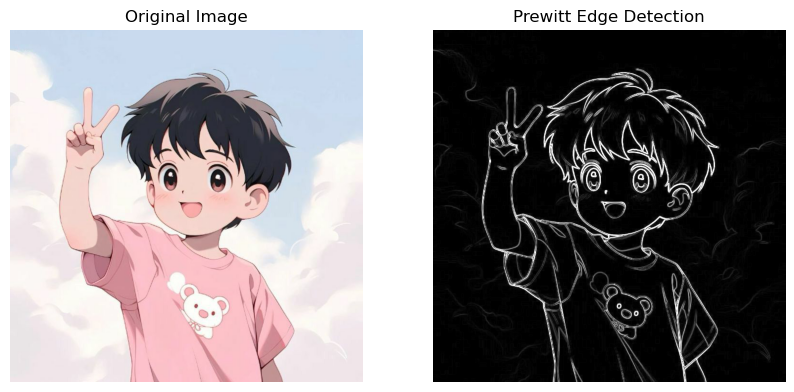

In [5]:
def prewitt_edge_detection(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = img_gray.astype(float)
    
    prewitt_x = np.array([[-1, 0, 1],
                           [-1, 0, 1],
                           [-1, 0, 1]])
    
    prewitt_y = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])
    
    edge_x = cv2.filter2D(img_gray, -1, prewitt_x)
    edge_y = cv2.filter2D(img_gray, -1, prewitt_y)
    
    edge_magnitude = np.sqrt(edge_x**2 + edge_y**2)
    edge_magnitude = np.clip(edge_magnitude, 0, 255)
    
    return edge_magnitude.astype(np.uint8)

image = cv2.imread("boy.jpeg")  
edges = prewitt_edge_detection(image)
    
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
 
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap="gray")
plt.title("Prewitt Edge Detection")
plt.axis("off")
    
plt.show()


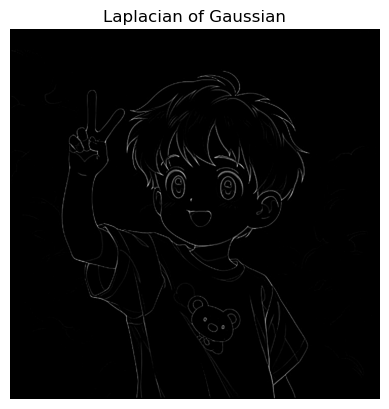

In [6]:
def gaussian_filter(kernel_size, sigma):
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    center = kernel_size // 2
    constant = 1 / (2 * np.pi * sigma**2)
    for x in range(kernel_size):
        for y in range(kernel_size):
            distance = (x - center)**2 + (y - center)**2
            kernel[x, y] = constant * np.exp(-distance / (2 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel

def laplacian_filter():
    return np.array([[0, 1, 0],
                     [1, -4, 1],
                     [0, 1, 0]], dtype=np.float32)

def convolve(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    output = np.zeros_like(image, dtype=np.float32)
    padded_image = np.pad(image, ((kernel_height // 2, kernel_height // 2),
                                  (kernel_width // 2, kernel_width // 2)), mode='constant', constant_values=0)
    for i in range(image_height):
        for j in range(image_width):
            # Multiply the kernel with the corresponding part of the image
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            output[i, j] = np.sum(region * kernel)
    return output

def laplacian_of_gaussian(image, kernel_size=3, sigma=1.0):
    gaussian_kernel = gaussian_filter(kernel_size, sigma)
    blurred_image = convolve(image, gaussian_kernel)
    laplacian_kernel = laplacian_filter()
    log_image = convolve(blurred_image, laplacian_kernel)
    log_image=np.clip(log_image,0,255)
    log_image=np.uint8(log_image)
    return log_image

image = cv2.imread('boy.jpeg', cv2.IMREAD_GRAYSCALE)

log_edges = laplacian_of_gaussian(image, kernel_size=5, sigma=1.0)

plt.imshow(log_edges, cmap='gray')
plt.title('Laplacian of Gaussian')
plt.axis('off') 
plt.show()


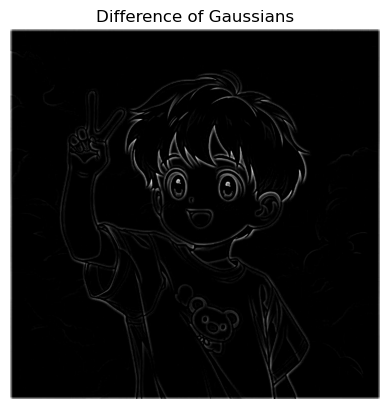

In [7]:
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma**2)) * np.exp(-((x - (size // 2))**2 + (y - (size // 2))**2) / (2 * sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)  
    
def convolution2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    padded_image = np.pad(image, ((kernel_height // 2, kernel_height // 2),
                                  (kernel_width // 2, kernel_width // 2)),
                          mode='constant', constant_values=0)
    output = np.zeros_like(image, dtype=np.float32)
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(region * kernel)
    return output

def difference_of_gaussians(image, sigma1=1.0, sigma2=2.0, kernel_size=5):
    kernel1 = gaussian_kernel(kernel_size, sigma1)
    kernel2 = gaussian_kernel(kernel_size, sigma2)
    blurred1 = convolution2d(image, kernel1)
    blurred2 = convolution2d(image, kernel2)
    dog_image = blurred1 - blurred2
    dog_image=np.clip(dog_image,0,255)
    dog_image=np.uint8(dog_image)
    return dog_image

image = cv2.imread('boy.jpeg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error loading image")
else:
    dog_edges = difference_of_gaussians(image, sigma1=0.5, sigma2=5.0, kernel_size=10)
    plt.imshow(dog_edges, cmap='gray')
    plt.title('Difference of Gaussians')
    plt.axis('off')  
    plt.show()
